In [1]:
from fuzzynumber import *

In [2]:
names = ['A', 'B', 'C', 'D']
values = [0.1, 0.3, 1, 0]
elements = [FuzzyElement(names[i], values[i]) for i in range(len(names))]
set1 = FuzzySet(elements)
print(set1)
set1['E'] = 0.3
print(set1)

| (A, 0.1) || (B, 0.3) || (C, 1) || (D, 0) |

| (A, 0.1) || (B, 0.3) || (C, 1) || (D, 0) || (E, 0.3) |


In [3]:
print(set1['E'])
del set1['E']
print(set1)

0.3
| (A, 0.1) || (B, 0.3) || (C, 1) || (D, 0) |


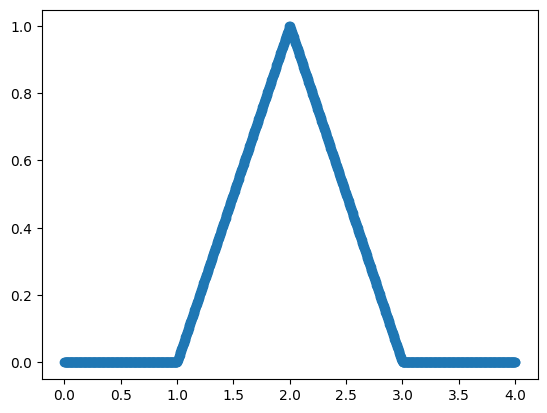

In [4]:
x = TFN(1, 2, 3)
fs = x.toFuzzySet(0, 4)
p = fs.plot()
plt.show()

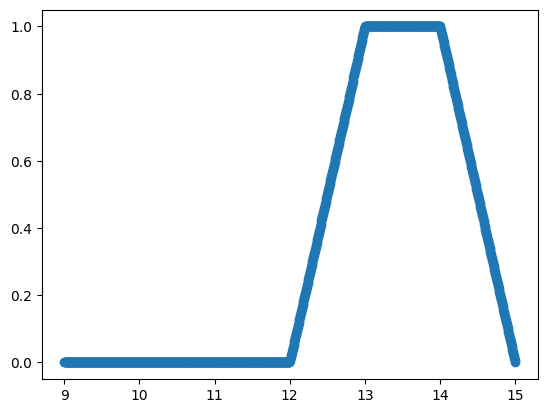

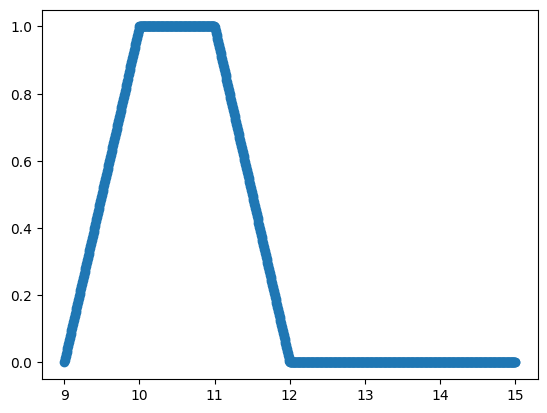

In [5]:
lb = TrFN(12, 13, 14, 15)
ub = TrFN(9, 10, 11, 12)
N = 1001
h = 1/N
lowLim = 9
upLim = 15
lf = lb.toFuzzySet(lowLim, upLim, N)
uf = ub.toFuzzySet(lowLim, upLim, N)
f1 = lf.plot()
f2 = uf.plot()
plt.show()


In [6]:
u = intNum(-1, -1).toFuzzySet(0, 0.7, 201)
s = 2

def ws(x, y):
    try:
        return 1/(2*y-x) + 1/(2*y+x)
    except ZeroDivisionError:
        return 1
for i in range(N+1):
    alpha = i*h
    x1 = lb.alphaCut(alpha)
    x2 = ub.alphaCut(alpha)
    perms = [ws(i, j) for i in [x1.lowLim, x1.upLim] for j in [x2.lowLim, x2.upLim]]
    lowLim = ws(x1.lowLim, x2.upLim)
    upLim = ws(x1.upLim, x2.lowLim)
    w = alpha*intNum(lowLim, upLim).toFuzzySet(0, 0.7, 201)
    u = u|w

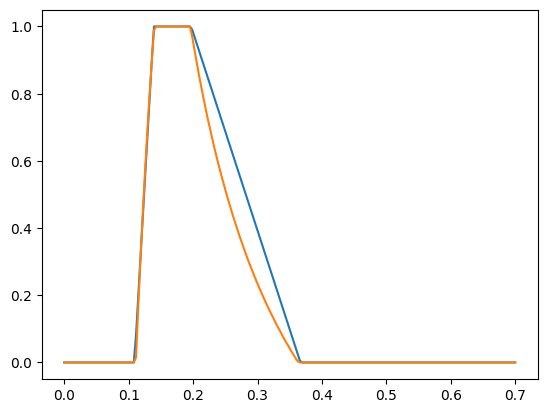

In [7]:
w = ws(lb, ub).toFuzzySet(0, 0.7, 201)
plt.plot(w.names, w.values)
plt.plot(u.names, u.values)
plt.show()

In [8]:
# def leftFunction(x):
#     return 1-x
# def rightFunction(x):
#     return 1-x

# x1 = LRFN(leftFunction, rightFunction, 3, 1, 1)
# x2 = LRFN(leftFunction, rightFunction, 2, 2, 2)
# x = x1 + x2
# xtf = x.toFuzzySet(0, 10, 201)
# fig = xtf.plot()


TypeError: toFuzzySet() takes from 1 to 2 positional arguments but 4 were given

In [ ]:
x1 = TFN(2, 3, 4)
x2 = TFN(0, 2, 4)
(x1+x2).toFuzzySet(0, 10, 201).plot()

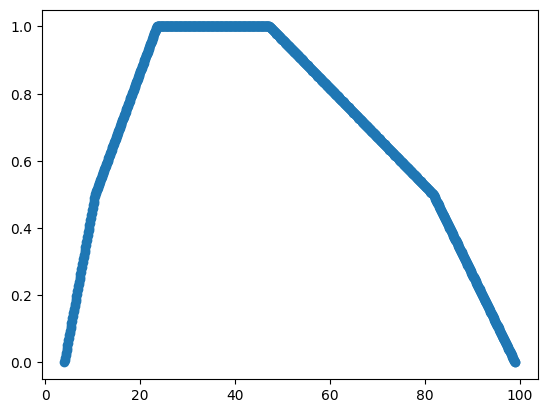

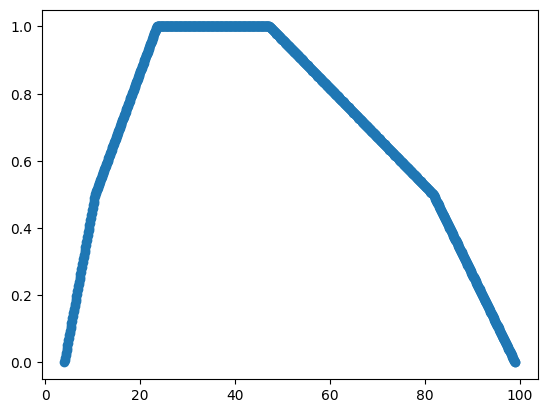

In [19]:
def hexagonalLeftFunction(x):
    a0 = 1
    a1 = 0.75
    a2 = 0.25
    if x>a0 or x<0:
        return 0
    elif a0 >= x > a1:
        return 2-2*x
    elif a1 >= x >= a2:
        return 1.25-x
    else:
        return 1
    
def hexagonalRightFunction(x):
    b0 = 1
    b1 = 0.75
    b2 = 0.25
    if x>b0 or x<0:
        return 0
    elif b0 >= x > b1:
        return 2-2*x
    elif b1 >= x >= b2:
        return 1.25-x
    else:
        return 1
    
hexFN1 = LRFN(hexagonalLeftFunction, hexagonalRightFunction, 5, 4, 4)
hexFN2 = LRFN(hexagonalLeftFunction, hexagonalRightFunction, 6, 2, 5)
(hexFN1*hexFN2).toFuzzySet().plot()